In [1]:
import pandas as pd
from IPython.display import Image

# 2. Метод .qcut() - РАЗДЕЛЕНИЕ ДАННЫХ НА ОСНОВЕ КВАНТИЛЕЙ

## Что такое КВАНТИЛЬ?

### Квантиль (quantile) — наиболее общий термин, который обозначает значение, совпадающее или ниже, чем определенная доля значений данных. Наиболее часто используемые квантили — квартили, квинтили, децили, перцентили. Квартиль — разделяет распределение на четверти, квинтили — на пятые части, децили — на десятые, перцентили - на сотые.

## Что такое КВАРТИЛЬ?

### Квартиль - это статистический термин, который описывает разделение наблюдений на четыре определенных интервала на основе значений данных и того, как они сравниваются со всем набором наблюдений.То есть квартиль - это тип квантиля, который делит количество точек данных на четыре части, более или менее равного размера.

### Зачем нужны квартили в статистике?


### Квартили играют важную роль в статистическом анализе данных. Они используются для определения межквартильного размаха (разницы между третьим и первым квартилями), который является мерой разброса данных.Также квартили используются для определения выбросов — значений, находящихся за пределами интерквартильного размаха. Эти значения могут указывать на наличие ошибок при сборе данных или быть результатом реальных аномалий в данных.


# ОПРОС (Время в пути на работу)

In [2]:
# был проведен опрос 150 сотрудников организации - сколько времени они проводят в дороге на работу - ответ в минутах
df_time=pd.read_csv('files/опрос_время_в_пути')
df_time.columns=['Код сотрудника', 'Время в пути (мин.)']
# с помощью метода .head() посмотрим первые 10 строчек датафрейма (по умолчанию метод показывает первые 5 строчек)
df_time.head(10)

,Код сотрудника,Время в пути (мин.)
0,afd678,25
1,afda1a,25
2,afdb82,30
3,afddb2,75
4,afdf4c,60
5,afe06e,65
6,afe2da,13
7,afe406,17
8,afe622,85
9,afe744,40


<AxesSubplot:>

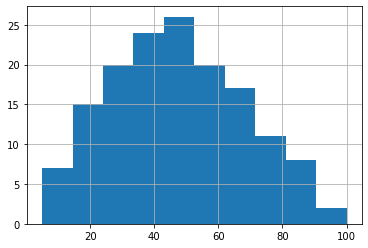

In [3]:
# построим гистограмму распеределния ответов участников опроса
# по горизонтальной оси - количество минут, по вертикальной - частота ответа
df_time['Время в пути (мин.)'].hist()

In [4]:
# метод describe показывает основные статистические характеристики данных по каждому числовому признаку
df_time.describe()

,Время в пути (мин.)
count,150.000000
mean,46.960000
std,21.169777
min,5.000000
25%,30.000000
50%,45.000000
75%,62.250000
max,100.000000


#### count - количество наблюдений = 150 (количество участвовавших в опросе человек)

#### mean - среднее значение	= 46.960000

#### std - стандартное отклонение (англ. Standard Deviation) = 21.169777 - это мера того, насколько разбросан набор данных. Вычисляя его, можно узнать, являются ли числа близкими к среднему значению или далеки от него. Если точки данных находятся далеко от среднего значения, то в наборе данных имеется большое отклонение; таким образом, чем больше разброс данных, тем выше стандартное отклонение.

#### min	- минимальное значение = 5 минут

#### 25%	- Q1 = ПЕРВЫЙ (НИЖНИЙ) КВАРТИЛЬ = 30.0
#### 50%	- Q2 = ВТОРОЙ КВАРТИЛЬ (МЕДИАНА) = 45.0
#### 75%	- Q3 = ТРЕТИЙ (ВЕРХНИЙ) КВАРТИЛЬ = 62.25

#### max	- максимальное значение = 100 минут

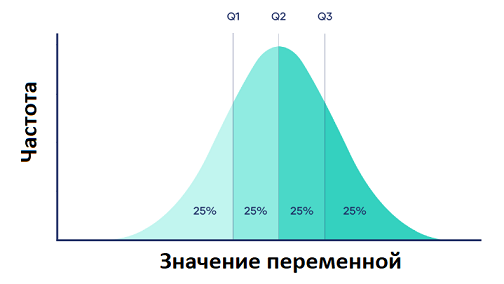

In [5]:
# В итоге у нас есть три точки - Q1, Q2 И Q3, КОТОРЫЕ ДЕЛЯТ НАШИ НАБЛЮДЕНИЯ НА ЧЕТЫРЕ ЧАСТИ
Image(filename='files/q1_q2_q3.png')

<AxesSubplot:>

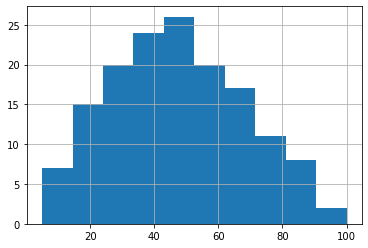

In [6]:
# еще раз построим гистограмму

# 25% - Q1 = ПЕРВЫЙ (НИЖНИЙ) КВАРТИЛЬ = 30.0
# 50% - Q2 = ВТОРОЙ КВАРТИЛЬ (МЕДИАНА) = 45.0
# 75% - Q3 = ТРЕТИЙ (ВЕРХНИЙ) КВАРТИЛЬ = 62.25
df_time['Время в пути (мин.)'].hist()

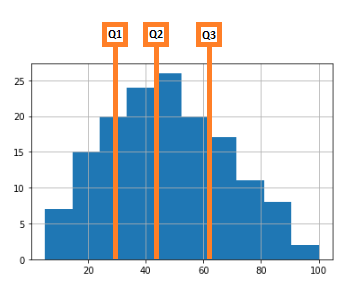

In [7]:
# визуальная оценка распределения
display(Image(filename='files/Q1Q2Q3.png'))

In [8]:
# Самое простое использование qcut - определить количество квантилей и позволить pandas разделить данные
# Параметр q означает количество частей, т.е. количество квантилей
# Параметр precision указывает на точность (прецизионность), т.е. на количество знаков после точки

test_result_q4_range = pd.qcut(df_time['Время в пути (мин.)'], q=4, precision=1)
df_time['Квартили (Диапазон)']=test_result_q4_range
df_time.head(10)

,Код сотрудника,Время в пути (мин.),Квартили (Диапазон)
0,afd678,25,"(4.9, 30.0]"
1,afda1a,25,"(4.9, 30.0]"
2,afdb82,30,"(4.9, 30.0]"
3,afddb2,75,"(62.2, 100.0]"
4,afdf4c,60,"(45.0, 62.2]"
5,afe06e,65,"(62.2, 100.0]"
6,afe2da,13,"(4.9, 30.0]"
7,afe406,17,"(4.9, 30.0]"
8,afe622,85,"(62.2, 100.0]"
9,afe744,40,"(30.0, 45.0]"


In [9]:
# Параметр q означает количество частей, т.е. количество квантилей
# Параметр precision указывает на точность (прецизионность), т.е. на количество знаков после точки
# Параметр labels принимает список с названиями групп, длина этого списка соответсвует количеству частей в парметре q

test_result_q4 = pd.qcut(df_time['Время в пути (мин.)'], 
                         q=4, 
                         precision=1, 
                         labels=['группа 1/4', 'группа 2/4', 'группа 3/4', 'группа 4/4'])
df_time['Квартили (Группа)']=test_result_q4
df_time.head(10)

,Код сотрудника,Время в пути (мин.),Квартили (Диапазон),Квартили (Группа)
0,afd678,25,"(4.9, 30.0]",группа 1/4
1,afda1a,25,"(4.9, 30.0]",группа 1/4
2,afdb82,30,"(4.9, 30.0]",группа 1/4
3,afddb2,75,"(62.2, 100.0]",группа 4/4
4,afdf4c,60,"(45.0, 62.2]",группа 3/4
5,afe06e,65,"(62.2, 100.0]",группа 4/4
6,afe2da,13,"(4.9, 30.0]",группа 1/4
7,afe406,17,"(4.9, 30.0]",группа 1/4
8,afe622,85,"(62.2, 100.0]",группа 4/4
9,afe744,40,"(30.0, 45.0]",группа 2/4


## Пример - разбиение данных на квинтили (на пятые части)

In [10]:
# данные о суммарных продажах корпоративным клиентам каких-то товаров
df_clients=pd.read_csv('files/total_sales_clients', index_col=[0])
df_clients.head()

,client id,total sales ($)
0,141962,63638.20
1,146832,99662.79
2,163416,77898.21
3,218895,137564.67
4,239344,91592.94


In [11]:
# можем узнать количество уникальных корпоративных клиентов
print('Количество корпоративных клиентов:', len(df_clients['client id']))
# проверяем, действительно ли в списке только уникальные клиенты
df_clients['client id'].nunique()

Количество корпоративных клиентов: 20


20

In [12]:
bin_labels_5 = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']
df_clients['client category'] = pd.qcut(df_clients['total sales ($)'],
                              q=5,
                              labels=bin_labels_5)
df_clients.head()

,client id,total sales ($),client category
0,141962,63638.20,Bronze
1,146832,99662.79,Gold
2,163416,77898.21,Bronze
3,218895,137564.67,Diamond
4,239344,91592.94,Silver


In [13]:
df_clients['client category'].value_counts()

Bronze      4
Silver      4
Gold        4
Platinum    4
Diamond     4
Name: client category, dtype: int64

In [14]:
# retbins=True

bin_labels =['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']
results, bin_edges = pd.qcut(df_clients['total sales ($)'],
                              q=5,
                              labels=bin_labels_5, retbins=True)

# с помощью функции zip мы объединяем названия категорий клиентов и пороговые значения интервалов
results_table = pd.DataFrame(zip(bin_edges,bin_labels ),
                            columns=['Порог ($)', 'Категория клиента'])
results_table

,Порог ($),Категория клиента
0,55733.050,Bronze
1,87185.234,Silver
2,96039.114,Gold
3,103696.378,Platinum
4,112297.630,Diamond


In [15]:
df_clients['total sales ($)'].describe(percentiles=[.2, .4, .6, .8])

count        20.000000
mean     101790.803000
std       27078.802091
min       55733.050000
20%       87185.234000
40%       96039.114000
50%      100383.215000
60%      103696.378000
80%      112297.630000
max      184941.150000
Name: total sales ($), dtype: float64